<a href="https://colab.research.google.com/github/keqiu1898/PS4HouseDataExercise/blob/master/Predict_House_Prices_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [134]:
# First, reading the Train Data and Test Data
train = pd.read_csv('https://raw.githubusercontent.com/keqiu1898/PS4HouseDataExercise/master/train.csv')
train.to_json('housedata.json')
train.head()
test_data = pd.read_csv('https://raw.githubusercontent.com/keqiu1898/PS4HouseDataExercise/master/test.csv')


# Data Structure

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

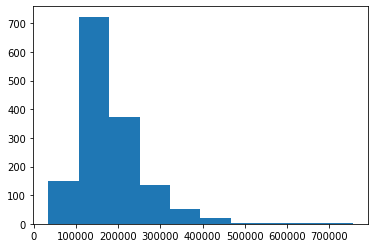

In [135]:
# histiram shows the distribution of SalePrice
plt.hist(train['SalePrice'])

Id


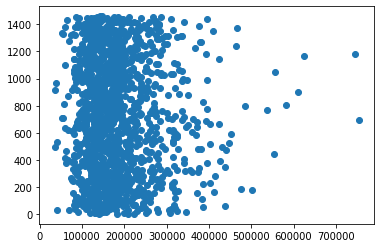

MSSubClass


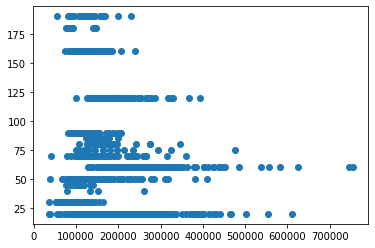

LotFrontage


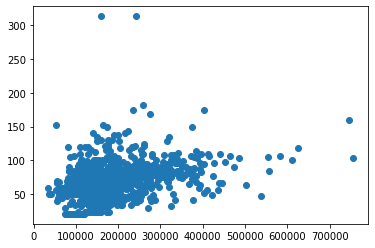

LotArea


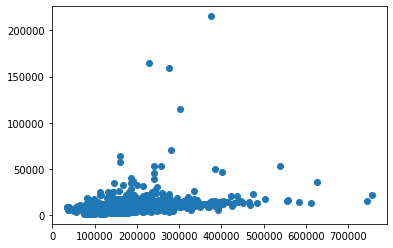

OverallQual


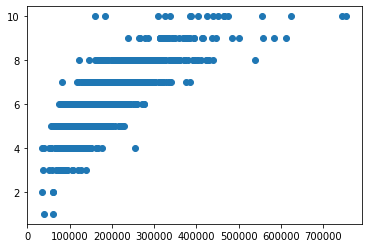

OverallCond


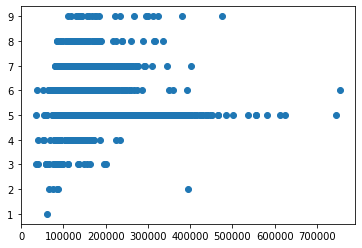

YearBuilt


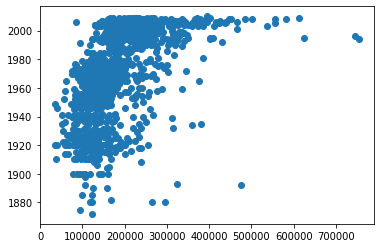

YearRemodAdd


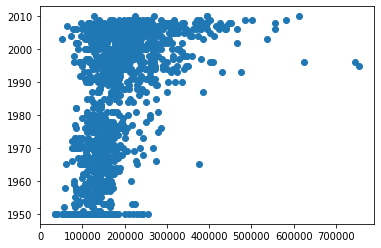

MasVnrArea


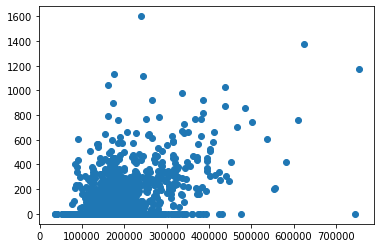

BsmtFinSF1


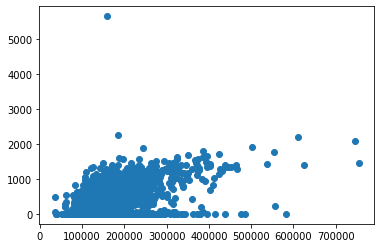

BsmtFinSF2


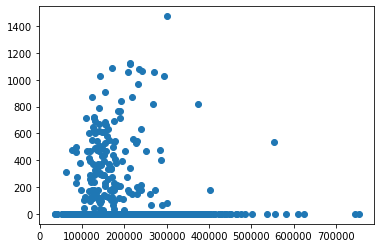

BsmtUnfSF


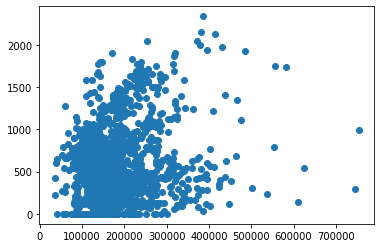

TotalBsmtSF


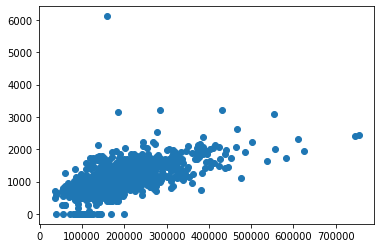

1stFlrSF


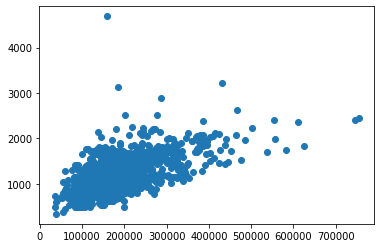

2ndFlrSF


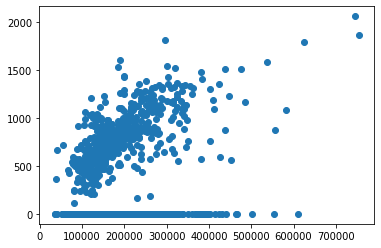

LowQualFinSF


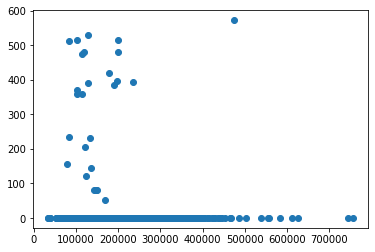

GrLivArea


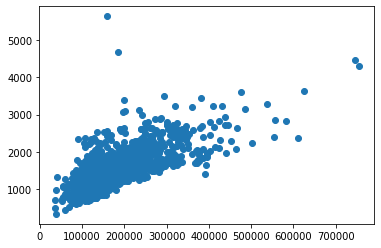

BsmtFullBath


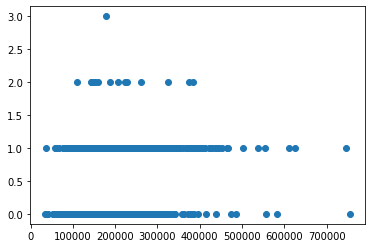

BsmtHalfBath


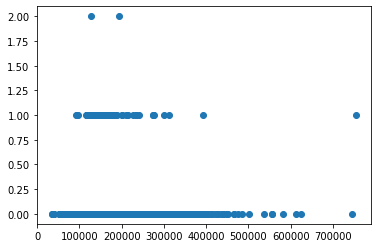

FullBath


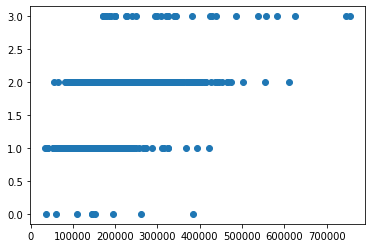

HalfBath


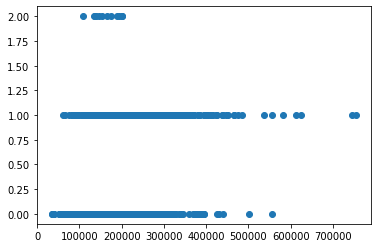

BedroomAbvGr


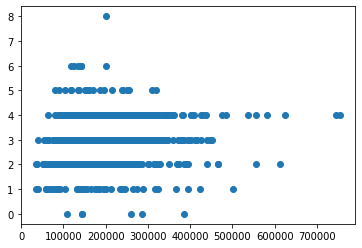

KitchenAbvGr


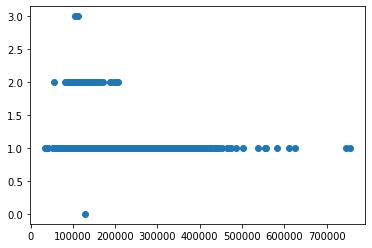

TotRmsAbvGrd


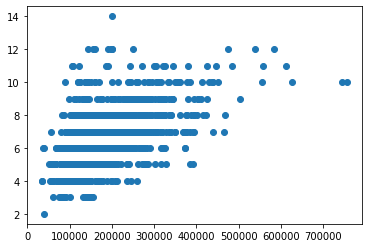

Fireplaces


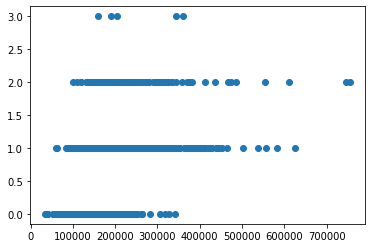

GarageYrBlt


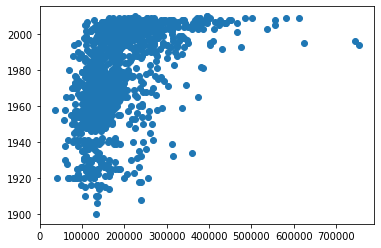

GarageCars


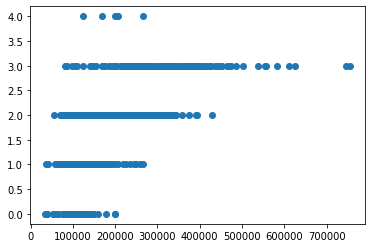

GarageArea


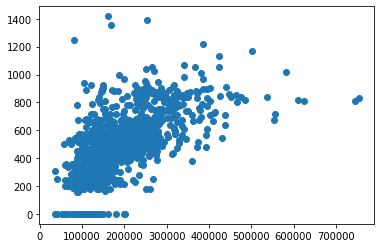

WoodDeckSF


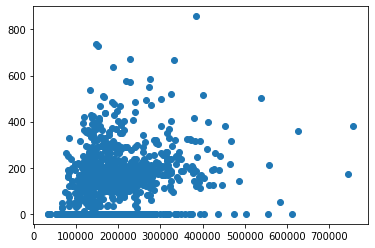

OpenPorchSF


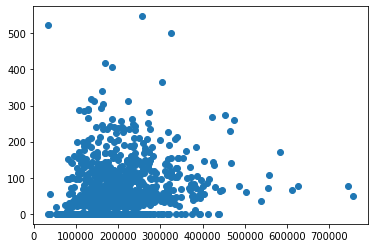

EnclosedPorch


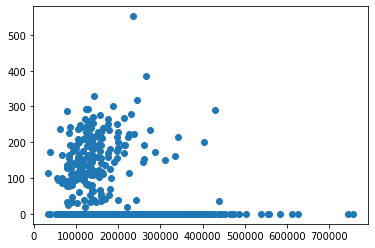

3SsnPorch


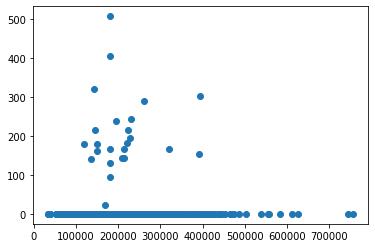

ScreenPorch


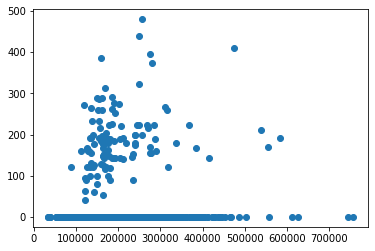

PoolArea


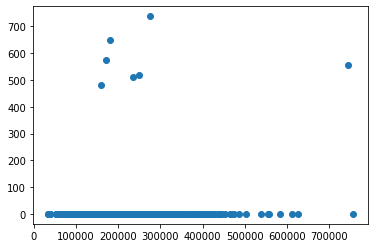

MiscVal


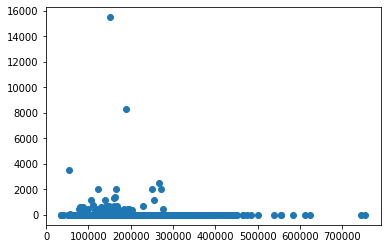

MoSold


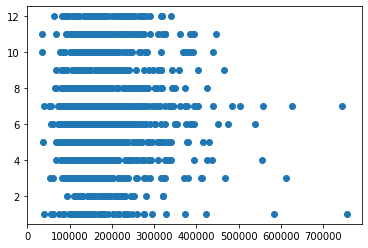

YrSold


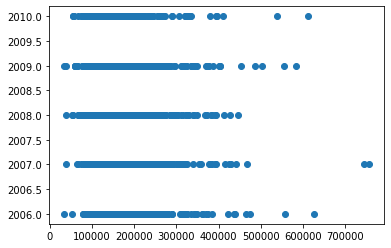

In [136]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number]) # features with numeric values
# Data Correlation (Scatters)
numeric_features = numeric.drop(['SalePrice'], axis = 1)
for i in numeric_features.columns:
     plt.scatter(numeric['SalePrice'],numeric[i], label = i) 
     print(i)
     plt.show()

In [137]:
# Using Correlation to Select Features
corr = numeric.corr()
print(corr['SalePrice'].sort_values(ascending=False))
# There are 10 features whose correlation with SalePrice is greater than 0.5
# We set 4 features sets.
cols_3 = corr['SalePrice'].sort_values(ascending=False)[0:3].index   # col_i, number of features
cols_6 = corr['SalePrice'].sort_values(ascending=False)[0:6].index 
cols_9 = corr['SalePrice'].sort_values(ascending=False)[0:9].index 
cols_11 = corr['SalePrice'].sort_values(ascending=False)[0:11].index 

print('3 Features: ', cols_3)
print('6 Features: ', cols_6)
print('9 Features: ', cols_9)
print('11 Features: ', cols_11)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [138]:
# Datasets corresponding to their feature sets; Y = SalePricee

X_2 = train[cols_3]  # X_i, data with i features
X_2 = X_2.drop(['SalePrice'], axis = 1)

X_5 = train[cols_6]  
X_5 = X_5.drop(['SalePrice'], axis = 1)

X_8 = train[cols_9]  
X_8 = X_8.drop(['SalePrice'], axis = 1)

X_10 = train[cols_11]  
X_10 = X_10.drop(['SalePrice'], axis = 1)

Y = train['SalePrice']


In [139]:
# buld Linear Regression Models for Dataset with 2, 5, 8, and 10 features, separatedly.
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lr_2 = linear_model.LinearRegression()
lr_5 = linear_model.LinearRegression()
lr_8 = linear_model.LinearRegression()
lr_10 = linear_model.LinearRegression()

model_2 = lr_2.fit(X_2, Y) # model_i, model with i number of features

model_5 = lr_5.fit(X_5, Y)

model_8 = lr_8.fit(X_8,Y)

model_10 = lr_10.fit(X_10, Y)

predictions_2 = model_2.predict(X_2)
predictions_5 = model_5.predict(X_5)
predictions_8 = model_8.predict(X_8)
predictions_10 = model_10.predict(X_10)

In [140]:
print("Coefficients: \n", model_2.coef_)  # the coefficients
print("Mean squared error: %.2f" % mean_squared_error(Y, predictions_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y, predictions_2))
print('-----------------------------------------')
print("Coefficients: \n", model_5.coef_)  # the coefficients
print("Mean squared error: %.2f" % mean_squared_error(Y, predictions_5))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y, predictions_5))
print('-----------------------------------------')
print("Coefficients: \n", model_8.coef_)  # the coefficients
print("Mean squared error: %.2f" % mean_squared_error(Y, predictions_8))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y, predictions_8))
print('-----------------------------------------')
print("Coefficients: \n", model_10.coef_)  # the coefficients
print("Mean squared error: %.2f" % mean_squared_error(Y, predictions_10))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y, predictions_10))
print('-----------------------------------------')


Coefficients: 
 [32849.04744063    55.86222591]
Mean squared error: 1802649051.76
Coefficient of determination: 0.71
-----------------------------------------
Coefficients: 
 [2.36350074e+04 4.53458230e+01 1.45443154e+04 1.71333928e+01
 3.15014753e+01]
Mean squared error: 1506639420.84
Coefficient of determination: 0.76
-----------------------------------------
Coefficients: 
 [ 2.37781487e+04  4.46841905e+01  1.43621456e+04  1.57416915e+01
  2.42491641e+01  1.11570750e+01  1.65539283e+03 -8.46109921e+02]
Mean squared error: 1500621536.16
Coefficient of determination: 0.76
-----------------------------------------
Coefficients: 
 [ 1.96045898e+04  5.12971178e+01  1.04179010e+04  1.49475334e+01
  1.98650991e+01  1.41737355e+01 -6.79087146e+03  3.31050771e+01
  2.68240707e+02  2.96481161e+02]
Mean squared error: 1427271411.72
Coefficient of determination: 0.77
-----------------------------------------


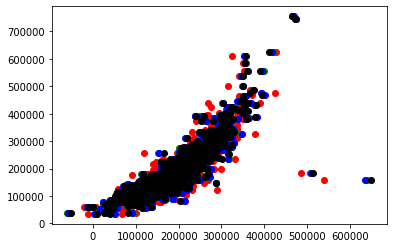

In [141]:
# The perdictions distribution
graph = plt.scatter(predictions_2, Y, color='r')
plt.scatter(predictions_5, Y, color='g')
plt.scatter(predictions_8, Y, color='b')
plt.scatter(predictions_10, Y, color='black')

The linear regressin with 10 features performs best, according to MSE and coefficient score. To avoid overfiting problem, we should further check whether the 10 features are all necessary.

Now we use OLS regression to check the t-values for each coefficients. 

In [142]:
# OLS regressions with 10 Features, 

clear_features_X10 = train[cols_11] 
clear_features_X10 = clear_features_X10.dropna()

clear_Y_10 = clear_features_X10['SalePrice']
clear_features_X10 = clear_features_X10.drop(['SalePrice'], axis = 1)

clear_features_X10 = sm.add_constant(clear_features_X10)


est_OLS_cor = sm.OLS(clear_Y_10, clear_features_X10)
est_OLS_cor_2 = est_OLS_cor.fit()
print(est_OLS_cor_2.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:31:42   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The explanation abilities of features 'GarageArea' and 'TotRmsAbvGrd' are low. 

Now use ordinary linear regression, without 'GarageArea' and 'TotRmsAbvGrd'.

In [143]:
clear_8features = clear_features_X10.drop(['GarageArea','TotRmsAbvGrd'], axis = 1)

est_OLS_10cor = sm.OLS(clear_Y_10, clear_8features)
est_OLS_10cor_2 = est_OLS_10cor.fit()
print(est_OLS_10cor_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     618.9
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:31:42   Log-Likelihood:                -17460.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1451   BIC:                         3.499e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.188e+06   1.28e+05     -9.255   

Now all features are significant.

Some features might not highly correlated with SalePrice, but can explain SalePrice in some degree that highly correlated features could not. 

Therefore, I run a general OLS over all features given by training dataset.

A General Version OLS.

In [144]:
# Second way, using the OLS to select features among all features

clear_features = numeric.dropna()
clear_Y = clear_features['SalePrice']

clear_features = clear_features.drop(['SalePrice'], axis=1) # drop 'SalePrice' column
clear_X = sm.add_constant(clear_features)


est = sm.OLS(clear_Y, clear_X)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     131.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:31:42   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1085   BIC:                         2.697e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.351e+05    1.7e+06     -0.197

Significant Features in OLS:

$['MSSubClass','OverallQual','OverallCond','YearBuilt','GrLivArea','GarageCars','BedroomAbvGr','KitchenAbvGr','MasVnrArea','LotArea','TotRmsAbvGrd']$

These 11 features are statistically significant in OLS. A OLS regression on the 11 features is shown as below.

In [145]:
features = ['MSSubClass','OverallQual','OverallCond','YearBuilt','GrLivArea','GarageCars','BedroomAbvGr','KitchenAbvGr','MasVnrArea','LotArea','TotRmsAbvGrd']
clear_X_11 = clear_X[['const']+features]

est_new = sm.OLS(clear_Y, clear_X_11)
est_new2 = est_new.fit()
print(est_new2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     383.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:31:43   Log-Likelihood:                -13407.
No. Observations:                1121   AIC:                         2.684e+04
Df Residuals:                    1109   BIC:                         2.690e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.168e+05   1.09e+05     -8.389   

Combining the 11 significant features we get from OLS and the 8 highly correlated features we get from correlation analysis, also adding constant term (some features exist in both sets).

Now we want to run a OLS on the 21 features

In [146]:
final_features = list(set(clear_8features).union( set(features)))
clear_finalX = clear_X[final_features]
est_final = sm.OLS(clear_Y, clear_finalX)
est_final2 = est_final.fit()
print(est_final2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     286.3
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:31:43   Log-Likelihood:                -13398.
No. Observations:                1121   AIC:                         2.683e+04
Df Residuals:                    1105   BIC:                         2.691e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TotalBsmtSF     11.8947      5.119      2.323   

Due to the correlation between features, we have to delete - '1stFlrSF', 'FullBath','YearRemodAdd'

Now we get our final 12 Features to estimate SalePrice, All of them are statistically significant. 

In [147]:
finalX = clear_finalX.drop(['1stFlrSF','FullBath','YearRemodAdd'], axis=1)
final = sm.OLS(clear_Y, finalX)
final2 = final.fit()
print(final2.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     358.2
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:31:43   Log-Likelihood:                -13399.
No. Observations:                1121   AIC:                         2.682e+04
Df Residuals:                    1108   BIC:                         2.689e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TotalBsmtSF     14.9080      3.610      4.130   

In the end, I reencode some features by standardzing and one-hot encoding, since features like building year has less numeric meanings. Then features would have similar magnitude.

In [148]:
transform_X = finalX.drop(['const'], axis = 1)
test_transform_X = test_data[transform_X.columns]
# Delete NAN
row,col = test_transform_X.shape
C = set()
for i in range(row):
    if any(pd.isnull(test_transform_X.iloc[i,j]) for j in range(col)):
        C.add(i)

test_transform_X = test_transform_X.dropna()

train_number = transform_X.shape[0]
test_number = test_transform_X.shape[0]
result = pd.concat([transform_X, test_transform_X], axis=0)


one_hot_year = pd.get_dummies(result['YearBuilt'], prefix='YearBuilt')
one_hot_Qual = pd.get_dummies(result['OverallQual'], prefix='OverallQual')
one_hot_Grd = pd.get_dummies(result['TotRmsAbvGrd'], prefix='TotRmsAbvGrd')
one_hot_kitchenGr = pd.get_dummies(result['KitchenAbvGr'],prefix='KitchenAbvGr' )
one_hot_Class = pd.get_dummies(result['MSSubClass'],prefix='MSSubClass')
one_hot_bedroomGr = pd.get_dummies(result['BedroomAbvGr'],prefix='BedroomAbvGr')
one_hot_Cond = pd.get_dummies(result['OverallCond'],prefix='OverallCond')
one_hot_Cars = pd.get_dummies(result['GarageCars'],prefix='GarageCars')


result = result.drop('YearBuilt',axis = 1)
result = result.drop('OverallQual',axis = 1)
result = result.drop('TotRmsAbvGrd',axis = 1)
result = result.drop('KitchenAbvGr',axis = 1)
result = result.drop('MSSubClass',axis = 1)
result = result.drop('BedroomAbvGr',axis = 1)
result = result.drop('OverallCond',axis = 1)
result = result.drop('GarageCars',axis = 1)
standardized_feature = list(result.columns)

result = pd.concat([result , one_hot_year], axis = 1)
result = pd.concat([result , one_hot_Qual], axis = 1)
result = pd.concat([result , one_hot_Grd], axis = 1)
result = pd.concat([result , one_hot_kitchenGr], axis = 1)
result = pd.concat([result , one_hot_Class], axis = 1)
result = pd.concat([result , one_hot_bedroomGr], axis = 1)
result = pd.concat([result , one_hot_Cond], axis = 1)
result = pd.concat([result , one_hot_Cars], axis = 1)
train_transform_X = result[:train_number]
test_transform_X = result[train_number:]
print(result.shape[0] == train_number+test_number)


# standardize
for column in standardized_feature:
      if isinstance(column, str):
         train_transform_X[column] = (train_transform_X[column] - train_transform_X[column].mean()) / train_transform_X[column].std()   
         test_transform_X[column] = (test_transform_X[column] - test_transform_X[column].mean()) / test_transform_X[column].std()          




# WITH CONSTANT
train_transform_X = sm.add_constant(train_transform_X)
test_transform_X = sm.add_constant(test_transform_X)

train_transform_X = train_transform_X.replace(to_replace=np.nan, value=0)
test_transform_X = test_transform_X.replace(to_replace=np.nan, value=0)


True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


To avoid overfitting, we control the parameters of our linear regression in some degree, that is to say we penalize the scale size of parameters. 

The size of penalization λ is selected by cross validation.

Coefficients: 
 [ 0.00000000e+00  6.05376005e+03  4.83916879e+03  3.00210908e+04
  4.91288746e+03  0.00000000e+00  0.00000000e+00 -8.61806993e+03
 -6.79253978e+03 -5.39672021e+03 -1.33574722e+04  7.36884799e+03
  3.01592573e+03 -5.16001230e+03 -1.49681378e+04  1.02414638e+03
  2.31050943e+03 -6.70923298e+02  5.62486572e+02 -1.04123906e+04
  0.00000000e+00 -4.84288435e+03  1.46806075e+03 -5.78317232e+03
 -8.62238456e+03 -1.44946559e+04 -4.53657545e+03 -3.42508959e+03
 -4.55921110e+03 -6.42768097e+03  2.15252014e+03  6.56833708e+02
  1.14456730e+04 -6.66495911e+03 -5.16909962e+03 -1.74524671e+01
 -4.49448122e+03 -1.28566112e+03 -2.58923350e+03 -4.05762096e+03
 -1.97267403e+03  7.69948978e+03  6.19158159e+03 -2.85528124e+03
  4.98098813e+03 -2.07583774e+03 -1.26083755e+03  5.93946038e+02
  6.81091002e+03 -2.13656140e+03 -1.61416793e+02  5.96252544e+03
 -5.58052529e+03 -1.87223347e+03 -5.01677197e+03 -5.51319388e+03
 -1.96863943e+03 -6.70005376e+03 -1.01613604e+04 -4.38590571e+03
 -6.59790

7.1

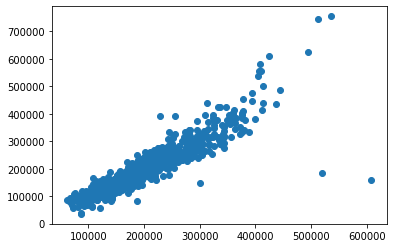

In [149]:
# One is using clear_Y
# The other is using clear_Y/max(clear_Y)
Ridge_CV =linear_model.RidgeCV(alphas=[7.0,7.1,7.2,7.3,7.4,7.5,], gcv_mode='auto').fit(train_transform_X, clear_Y) # ridge regression with cross validation
Ridge_CV_predictions = Ridge_CV.predict(train_transform_X)
print("Coefficients: \n", Ridge_CV.coef_)  # the coefficients
print("Mean squared error: %.2f" % mean_squared_error(clear_Y, Ridge_CV_predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(clear_Y, Ridge_CV_predictions))

plt.scatter(Ridge_CV_predictions, clear_Y)
Ridge_CV.alpha_

### Prediction

In [150]:
Ridge_CV_predictions = Ridge_CV.predict(test_transform_X)
print(Ridge_CV_predictions)

[ 96911.53049583  78493.06688324 269791.51236817 147010.10911626
 210056.41268052 136701.17035262 153720.33673596  69916.43693139
 216737.0054359  149796.93266748 120644.37983314 118398.33114462
 152222.45247918  78245.35728661 147295.44711576 227627.84369178
 228614.60826536 214834.42365844 172115.13695751 207104.58246572
 156968.42369846 190853.96870328 118159.59453728 201145.71710073
 338088.93695009 126237.70322238 158167.66695881 277274.34367247
 117365.22563407 127592.0413027  141543.67667947 191066.50703092
 325770.78705955 247241.20159843 111545.5923336   71434.74552023
 324850.32654832 268382.43268065 122685.82584542  69658.33568993
 167827.1464377  190022.19056292 186402.2344687  259315.10869137
 294303.2992521  173046.23776138 405187.72133267 152488.86650602
 159174.27992355 119218.45133325 183743.47579444 186517.72482913
 198642.0928684  166247.48029012 242855.12149782 176397.6536718
 205701.80692271 240858.62515173 374991.01389888 203816.81361721
 216776.18894846 146364.10

In [151]:
# Adding the NAN
num = 0
for i in sorted(list(C)):
   Ridge_CV_predictions = np.insert(Ridge_CV_predictions, i+num, np.NAN)
   num+=1

In [155]:
prediction = pd.DataFrame(Ridge_CV_predictions, columns = ['SalePrice'])
OUTPUTS = pd.concat([test_data['Id'] , prediction], axis = 1)
print(OUTPUTS)
OUTPUTS.to_csv('predictions.csv')

       Id      SalePrice
0    1001   96911.530496
1    1002   78493.066883
2    1003  269791.512368
3    1004  147010.109116
4    1005  210056.412681
..    ...            ...
455  1456  166013.360052
456  1457  212732.330511
457  1458  216722.162905
458  1459  141315.971809
459  1460  143771.923289

[460 rows x 2 columns]
